# ML MODEL DEVELOPMENT
## ML - K-MEANS Clustering Explained
## Example from [Neptune](https://neptune.ai/blog/k-means-clustering)

<details>
    <summary>Intro & Definition</summary>
    Clustering is a type of unsupervised learning where the references need to be drawn from unlabelled datasets. Generally, it is used to capture meaningful structure, underlying processes, and grouping inherent in a dataset. In clustering, the task is to divide the population into several groups in such a way that the data points in the same groups are more similar to each other than the data points in other groups. In short, it is a collection of objects based on their similarities and dissimilarities.

    With clustering, data scientists can discover intrinsic grouping among unlabelled data. Though there are no specific criteria for a good clustering and it completely depends on the user, how they want to use it for their specific needs. It can be used to find unusual data points/outliers in the data or to identify unknown properties to find a suitable grouping in the dataset.

    Let’s take an example, imagine you work in a Walmart Store as a manager and would like to better understand your customers to scale up your business by using new and improved marketing strategies. It is difficult to segment your customers manually. You have some data that contains their age and purchase history, here clustering can help to group customers based on their spending. Once the customer segmentation will be done, you can define different marketing strategies for each of the groups as per target audiences.
</details>

### Implementation of K-Means Clustering in Python

In [61]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns

In [3]:
# Load dataset
file_customers = "../../data/Mall_Customers.csv"
df_customers = pd.read_csv(file_customers)

In [4]:
# Explore dataset
df_customers.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Check columns with NAs
df_customers = df_customers.rename(columns = {'Annual_Income_(k$)': 'Annual_Income'})
df_customers.isna().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### Implementation of K-Means from scratch
Annual Income and Spending Score variables will be used.

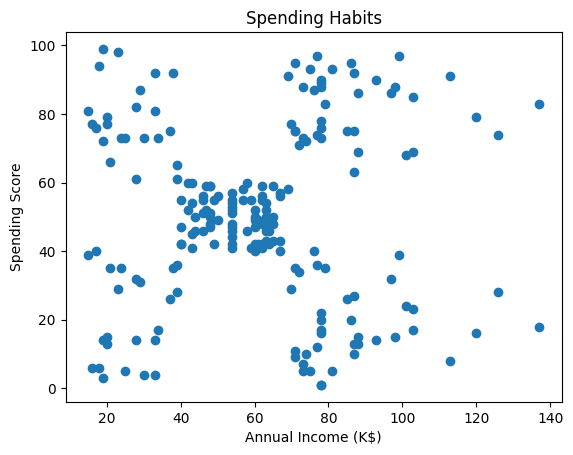

In [12]:
# Visualize variables of interest
plt.scatter(df_customers['Annual_Income'], df_customers['Spending_Score'])
plt.title(label = "Spending Habits")
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score')
plt.show()

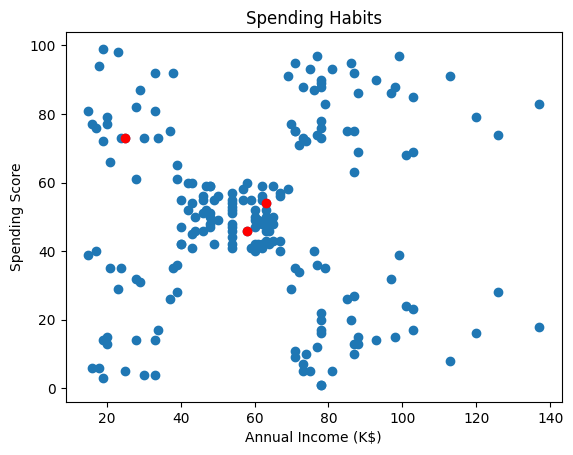

In [48]:
# Initialization of random centroids

## Initial # of Clusters
K = 3

## select random K customer records
df_centroids = df_customers.sample(n = K)

## Visualize location of the selected cluster centroids
plt.scatter(df_customers['Annual_Income'], df_customers['Spending_Score'])
plt.scatter(df_centroids['Annual_Income'], df_centroids['Spending_Score'], c = "red")
plt.title(label = "Spending Habits")
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Find the actual K Clusters
# This will be an iteration through each centroid & data points

mask = df_customers['CustomerID'].isin(df_centroids.CustomerID.tolist())

X = df_customers[~mask]

diff = 1
j = 0
XD = X

while(diff != 0):

    i = 1

    for index1, row_c in df_centroids.iterrows():

        ED=[]

        for index2, row_d in XD.iterrows():
            d1 = (row_c["Annual_Income"] - row_d["Annual_Income"]) **2
            d2 = (row_c["Spending_Score"] - row_d["Spending_Score"]) **2
            d = np.sqrt(d1+d2)
            ED.append(d)

        X[i]=ED
        i=i+1

    C=[]

    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1

        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1

        C.append(pos)

    X["Cluster"] = C

    #print(X)

    centroids_new = X.groupby(["Cluster"]).mean(numeric_only=True)[["Spending_Score", "Annual_Income"]]

    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['Spending_Score'] - df_centroids['Spending_Score']).sum() + (centroids_new['Annual_Income'] - df_centroids['Annual_Income']).sum()

    #print(X)

    df_centroids = X.groupby(["Cluster"]).mean(numeric_only=True)[["Spending_Score", "Annual_Income"]]

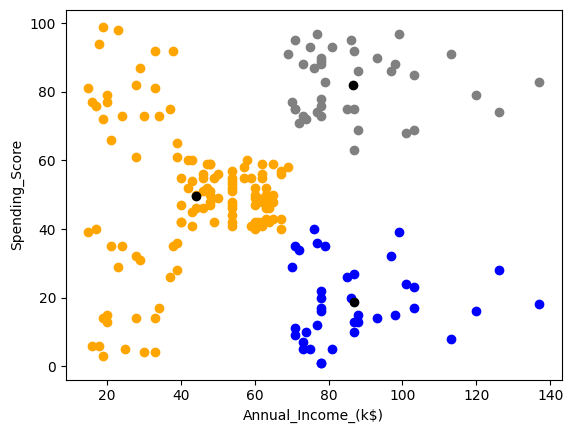

In [50]:
# Visualize Clusters and their respective centroid
color=['grey','blue','orange']

for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income"], data["Spending_Score"],c=color[k])

plt.scatter(df_centroids["Annual_Income"], df_centroids["Spending_Score"], c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

### Implementation of K-Means using Scikit-Learn
Scikit Learn has a clustering package that includes a K-means function which is optimized and very popular among researchers.

In [53]:
# Create a KMeans model and train it

km_sample = KMeans(n_clusters = 3)

km_sample.fit(df_customers[['Annual_Income', 'Spending_Score']])

KMeans(n_clusters=3)

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

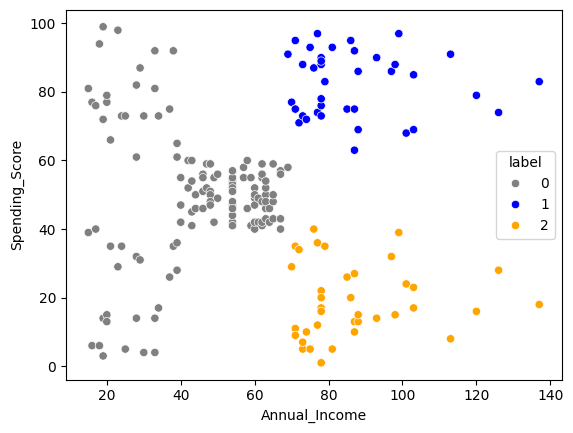

In [ ]:
# Explore data
# Note: KMeans classified customers into 3 groups:
# 1) Savers (High income with low spending score)
# 2) Spenders (High income with high spending score)
# 3) Carefree (Low income with spending scores all over the place - include high)

labels_sample = km_sample.labels_
df_customers['label'] = labels_sample

sns.scatterplot(
    x = df_customers['Annual_Income'],
    y = df_customers['Spending_Score'],
    hue = df_customers['label'],
    palette = color
)

### How to choose K for KMean modeling?
Selecting a lower number of cluster will result in under fitting the model 
while a high number of cluster will result in over fitting the model.

The optimal number of clusters depends on the similarity measures and the parameters used for clustering. There are few techniques that can be used to determine the optimal number of clusters: `Cross-validation`, `Elbow method`, `Information Criteria`, `Silhouette method`, and `G-Means algorithm`.

#### 1 - Elbow Method
Elbow point is used as a cutoff point in mathematical optimization to decide at which point the diminishing returns are no longer worth the additional cost. In clustering, this is used to choose the number of cluster when adding another cluster does not improve the outcomes of modeling.

In [62]:
# Compute the average distance to the centroid accross all data points

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [ ]:
# K means determine k
distortions = []

K = range(1, 10)

for k in K:
    mod_kmean = KMeans(n_clusters=k).fit(X)
    mod_kmean.fit(X)
    distortions.append(sum(np.min(cdist(XA = X,
                                        XB = mod_kmean.cluster_centers_, metric = 'euclidean'),
                                  axis = 1)) / X.shape[0])

distortions

[np.float64(3.4577032384495707),
 np.float64(1.7687413573405673),
 np.float64(0.8819889697423957),
 np.float64(0.823739573172634),
 np.float64(0.6775594781864775),
 np.float64(0.5795493909275669),
 np.float64(0.5011180183785474),
 np.float64(0.450964381739326),
 np.float64(0.34775130207789257)]

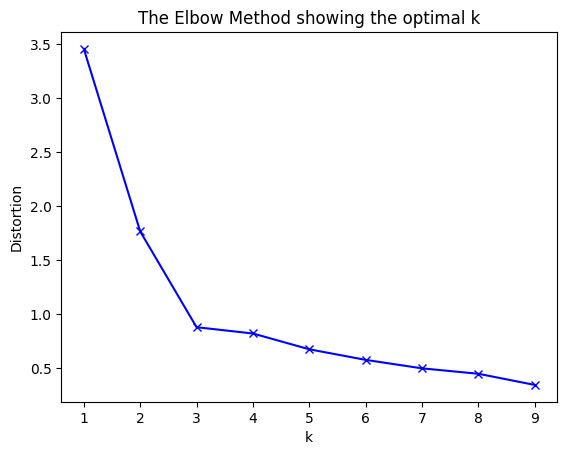

In [ ]:
# Visualize
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### 2- Silhouette Method


In [66]:
# Synthetic data
np.random.normal(10, 2, 30)
np.random.rand(100, 6)

array([[0.04338873, 0.42846931, 0.79837345, 0.69764343, 0.83874487,
        0.05321698],
       [0.66119074, 0.80834825, 0.39831408, 0.62594315, 0.62702251,
        0.21757331],
       [0.16226441, 0.59436052, 0.75812747, 0.10992847, 0.07586698,
        0.25262724],
       [0.23460616, 0.31723344, 0.1889045 , 0.95196326, 0.95057083,
        0.21873508],
       [0.35045156, 0.70997049, 0.44235863, 0.22666278, 0.46747932,
        0.3951514 ],
       [0.25794975, 0.80917321, 0.68512056, 0.19924474, 0.74702206,
        0.87098176],
       [0.66901325, 0.33844763, 0.6366215 , 0.70466053, 0.89805768,
        0.99984613],
       [0.43632107, 0.72287344, 0.32803281, 0.65854549, 0.01469178,
        0.46378785],
       [0.26094934, 0.48112411, 0.19723651, 0.37458315, 0.06695828,
        0.1808214 ],
       [0.28817966, 0.6080691 , 0.4314323 , 0.52971168, 0.55864305,
        0.61193245],
       [0.2321345 , 0.411017  , 0.02764565, 0.90681532, 0.03442035,
        0.16573049],
       [0.8132211 , 0